# Projeto 2 - Ciência dos dados

#### Nomes: Pedro Henrique Britto Aragão Andrade, Letícia Teles Machado, Thiago Shiguero Kawahara

In [239]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [240]:
# Abrindo o dataset

dadoscru= pd.read_csv("chocolate.csv")
dadoscru

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,2219,1205,Zotter,Austria,2014,Blend,Raw,80.0,2.75,4,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
2220,2220,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
2221,2221,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
2222,2222,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


In [241]:
# Filtrando as colunas

dados_= dadoscru.iloc[:, [3, 5, 7, 8, 9, 11, 12, 13, 17, 18]]

In [242]:
# Renomenando as colunas

dados= dados_.rename(columns= {"company": "cia", "company_location": "local_cia", "country_of_bean_origin": "país_grão",
                      "cocoa_percent": "%cacau", "counts_of_ingredients": "num_ingr", "cocoa_butter": "manteiga_cacau",
                      "vanilla": "baunilha", "lecithin": "lecitina", "first_taste": "1_sabor", "second_taste": "2_sabor"})

In [243]:
# Renomeando as linhas

dados.loc[dados.manteiga_cacau== "have_cocoa_butter", "manteiga_cacau"]= "yes"
dados.loc[dados.manteiga_cacau== "have_not_cocoa_butter", "manteiga_cacau"]= "no"

dados.loc[dados.baunilha== "have_not_vanila", "baunilha"]= "no"
dados.loc[dados.baunilha== "have_vanila", "baunilha"]= "yes"

dados.loc[dados.lecitina== "have_not_lecithin", "lecitina"]= "no"
dados.loc[dados.lecitina== "have_lecithin", "lecitina"]= "yes"

In [244]:
# Ordenando as colunas com yes/no

dados.manteiga_cacau = pd.Categorical(dados.manteiga_cacau, categories=['yes', 'no'], ordered=True)
dados.baunilha = pd.Categorical(dados.baunilha, categories=['yes', 'no'], ordered=True)
dados.lecitina = pd.Categorical(dados.lecitina, categories=['yes', 'no'], ordered=True)

In [247]:
# doce
# salgado
# amargo
# acido
# gorduroso
# complexo

In [245]:
# l=[]
# for i in list(dados["1_sabor"]):
#     if i not in l:
#         l.append(i)

# for i in l:
#     print(i)
#     x = input("")
#     dados.loc[dados["1_sabor"]==i,["1_sabor"]] = x

In [246]:
dados

,local_cia,país_grão,%cacau,rating,num_ingr,manteiga_cacau,baunilha,lecitina,1_sabor,2_sabor
0,U.S.A,Madagascar,76.0,3.75,3,yes,no,no,cocoa,blackberry
1,U.S.A,Dominican republic,76.0,3.50,3,yes,no,no,cocoa,vegetal
2,U.S.A,Tanzania,76.0,3.25,3,yes,no,no,rich cocoa,fatty
3,France,Peru,63.0,3.75,4,yes,no,yes,fruity,melon
4,France,Bolivia,70.0,3.50,4,yes,no,yes,vegetal,nutty
...,...,...,...,...,...,...,...,...,...,...
2219,Austria,Blend,80.0,2.75,4,yes,no,no,waxy,cloying
2220,Austria,Colombia,75.0,3.75,3,yes,no,no,strong nutty,marshmallow
2221,Austria,Belize,72.0,3.50,3,yes,no,no,muted,roasty
2222,Austria,Congo,70.0,3.25,3,yes,no,no,fatty,mild nuts


1º Coluna (cia)- Companhia da barra de chocolate $\Rightarrow$ qualitativa

2º Coluna (local_cia)- Localização da companhia $\Rightarrow$ qualitativa

3º Coluna (país_grão)- País de origem do grão $\Rightarrow$ qualitativa

4º Coluna (%cacau)- Porcentagem de cacau $\Rightarrow$ quantitativa

5º Coluna (rating)- Avaliação de 0 a 4 $\Rightarrow$ qualitativa ordinal

6º Coluna (num_ingr)- Número de ingredientes $\Rightarrow$ quantitativo

7º Coluna (manteiga_cacau)- Se possui manteiga de cacau (yes/no) $\Rightarrow$ qualitativa

8º Coluna (baunilha)- Se possui baunilha (yes/no) $\Rightarrow$ qualitativa

9º Coluna (lecitina)- Se possui leticina (yes/no) $\Rightarrow$ qualitativa

10º Coluna (1_sabor)- Primeiro sabor $\Rightarrow$ qualitativa

11º Coluna (2_sabor)- Segundo sabor $\Rightarrow$ qualitativa

In [249]:
# Para analise exploratoria das colunas manteiga_cacau, baunilha e lecitina em relaçao ao rating

# Coleta de dados
def yes_no(a):
    lista= [[1, 1.5], [1.5, 2], [2, 2.5], [2.5, 3], [3, 3.5], [3.5, 4.1]]
    yes= []
    no= []
    
    for i in range (len(lista)):
        contagem= dados.loc[(dados.rating >= lista[i][0]) & (dados.rating < lista[i][1]), a].value_counts(sort=False)
        
        yes.append(round((contagem[0] / (contagem[0] + contagem[1]))*100, 2))
        no.append(round((contagem[1] / (contagem[0] + contagem[1]))*100, 2))

    # Grafico de barras
    largura = 0.25

    c = np.arange(len(yes))
    b = [j+largura for j in c]

    plt.figure(figsize=(10,5))

    plt.bar(c, yes, color="lightgreen", width=largura, label="Yes")
    plt.bar(b, no, color="lightpink", width=largura, label="No")

    plt.xticks([i+0.11 for i in range(len(yes))],["1 - 1.5","1.5 - 2","2 - 2.5","2.5 - 3","3 - 3.5","3.5 - 4"])
    plt.xlabel("Intervalos do rating")
    plt.ylabel("Porcentagem")
    plt.title(a)

    plt.legend()
    plt.show()

In [250]:
# Para analise exploratoria das colunas cia, local_cia e país_grão em relaçao ao rating

def media(a):
    
    # Criando um dicionário com o nome de cada empresa e sua respectiva média de Rating 
    dicionario= {}
    for i in dados.loc[:, a]:
        if i not in dicionario:
            dicionario[i]= round(np.mean(dados.loc[dados[a]== i, "rating"]), 2)
    c= []
    d= []

    # Tabela que relaciona a companhia com o intervalo que a sua média de rating se encaixa
    for i in dicionario.items():
        c.append(i[0])
        if i[1] >= 1 and i[1] < 1.5:
            d.append("1 - 1.5")  

        elif i[1] >= 1.5 and i[1] < 2:
            d.append("1.5 - 2")

        elif i[1] >= 2 and i[1] < 2.5:
            d.append("2 - 2.5")

        elif i[1] >= 2.5 and i[1] < 3:
            d.append("2.5 - 3")

        elif i[1] >= 3 and i[1] < 3.5:
            d.append("3 - 3.5")

        elif i[1] >= 3.5 and i[1] <= 4:
            d.append("3.5 - 4")

    data = {a:  c, 'intervalo': d,
            }

    novo = pd.DataFrame(data, columns = [a,'intervalo'])

    novo["intervalo"] = novo["intervalo"].astype("category")
    novo['intervalo'].cat.categories
    novo["intervalo"] = pd.Categorical(novo.intervalo,['1 - 1.5', '2 - 2.5', '2.5 - 3'
                                                       , '3 - 3.5', '3.5 - 4'], ordered=True)
    return pd.crosstab(novo[a], novo.intervalo, margins= True)

In [228]:
# Grafico de barras para ler os dados da funcao media()

def grafico(l1, l2, d):

    plt.figure(figsize=(8,4))

    plt.bar(l1, l2)
    plt.xlabel("Interlavo de rating")
    plt.ylabel(f"Quantidade de {d}")
    plt.title(f"Quantidade de {d} nos intervalos de rating")

    plt.tight_layout()
    plt.show()

In [229]:
# local_cia x rating

media("local_cia")

intervalo,2.5 - 3,3 - 3.5,3.5 - 4,All
local_cia,,,,
Argentina,0,0,1,1
Australia,0,1,0,1
Austria,0,1,0,1
Belgium,0,1,0,1
Bolivia,0,1,0,1
...,...,...,...,...
Vanuatu,1,0,0,1
Venezuela,0,1,0,1
Vietnam,0,1,0,1


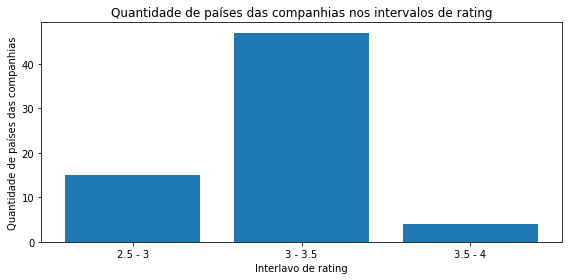

In [230]:
l1= ["2.5 - 3", "3 - 3.5", "3.5 - 4"]
l2= [15, 47, 4]

grafico(l1, l2, "países das companhias")

In [231]:
# país_grão x rating

media("país_grão")

intervalo,2.5 - 3,3 - 3.5,3.5 - 4,All
país_grão,,,,
Australia,0,1,0,1
Belize,0,1,0,1
Blend,0,1,0,1
Bolivia,0,1,0,1
Bolvia,0,1,0,1
...,...,...,...,...
Uganda,1,0,0,1
Vanuatu,0,1,0,1
Venezuela,0,1,0,1


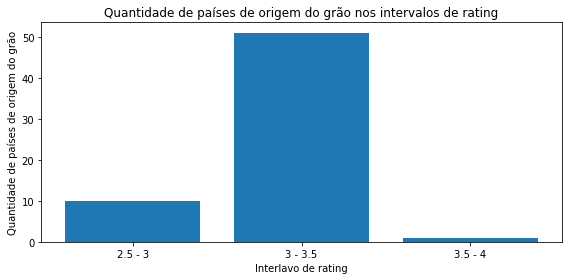

In [232]:
l1= ["2.5 - 3", "3 - 3.5", "3.5 - 4"]
l2= [10, 51, 1]

grafico(l1, l2, "países de origem do grão")

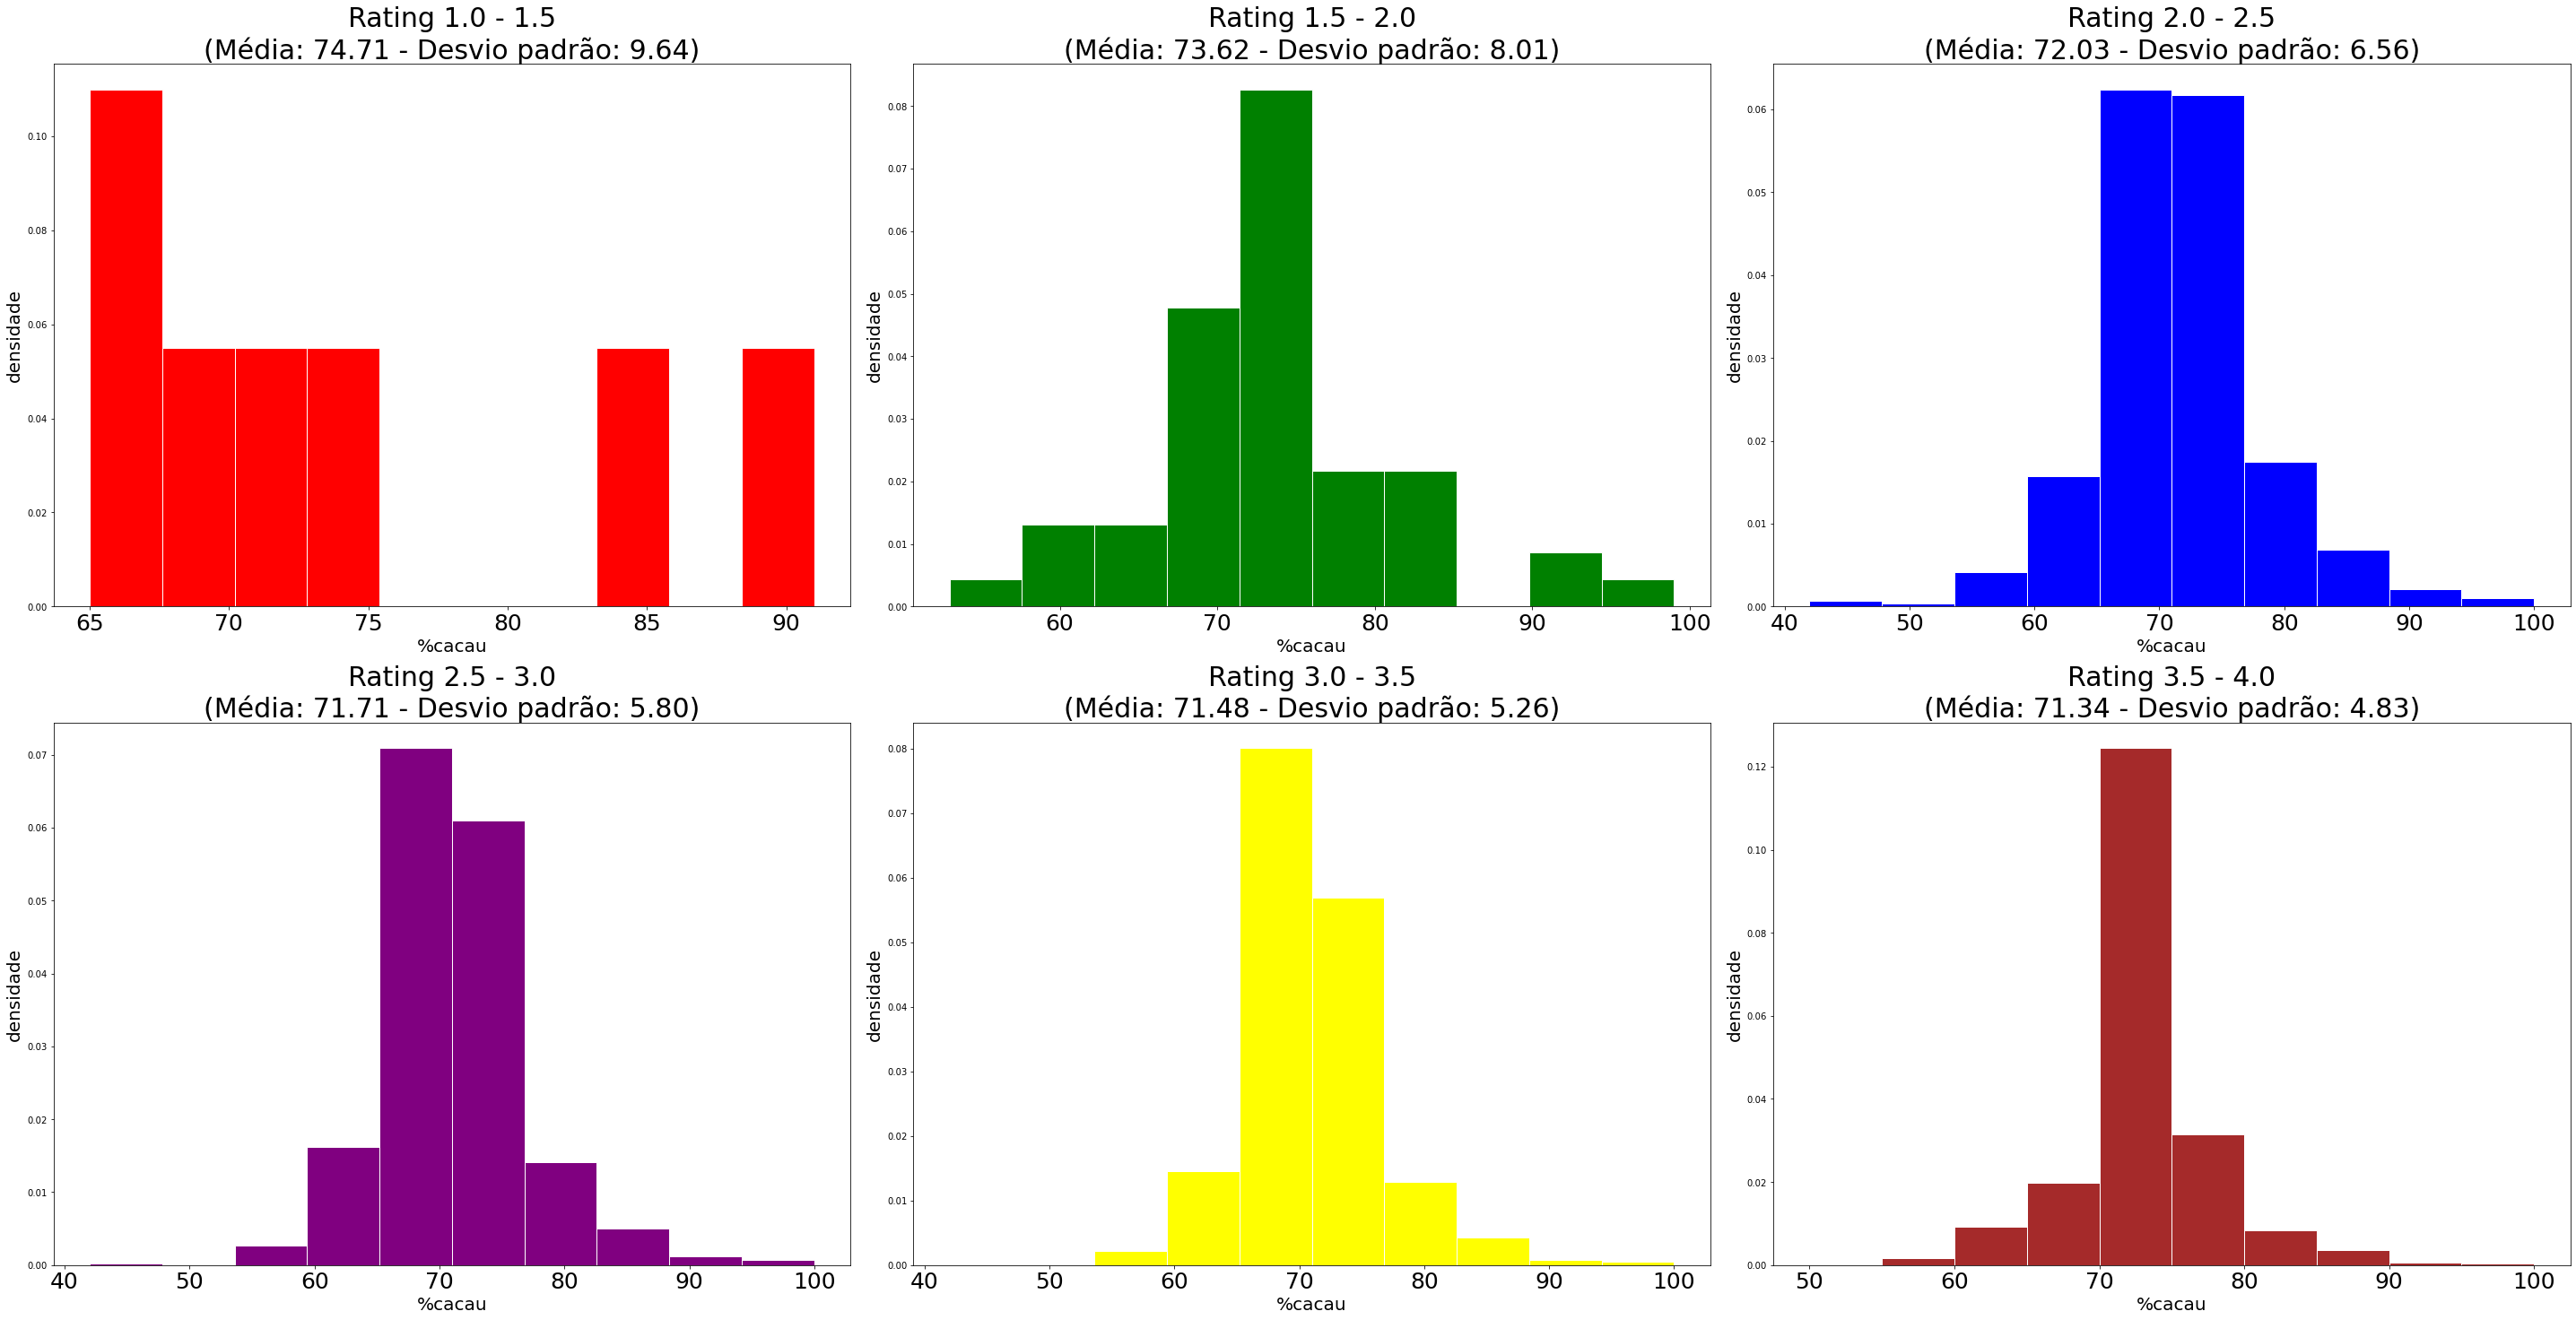

In [233]:
# %cacau x rating

plt.figure(figsize=(40,30))
cor = ["red","green","blue","purple","yellow","brown"]
i = 0.5
j=1
while i+0.5<4:
    a = dados.loc[(dados.rating>=i) & (dados.rating<i+1.5),["%cacau"]]
    i+=0.5
    b = a.mean()
    c = a.std()
    plt.subplot(3,3,j)
    plt.hist(a,bins=10, density=True, color=cor[j-1], edgecolor="w")
    plt.title(f"Rating {i} - {i+0.5}\n(Média: {b[0]:.2f} - Desvio padrão: {c[0]:.2f})", fontsize=30)
    plt.ylabel("densidade", fontsize=20)
    plt.xlabel("%cacau", fontsize=20)
    plt.xticks(fontsize=25)
    j+=1
    
plt.tight_layout()

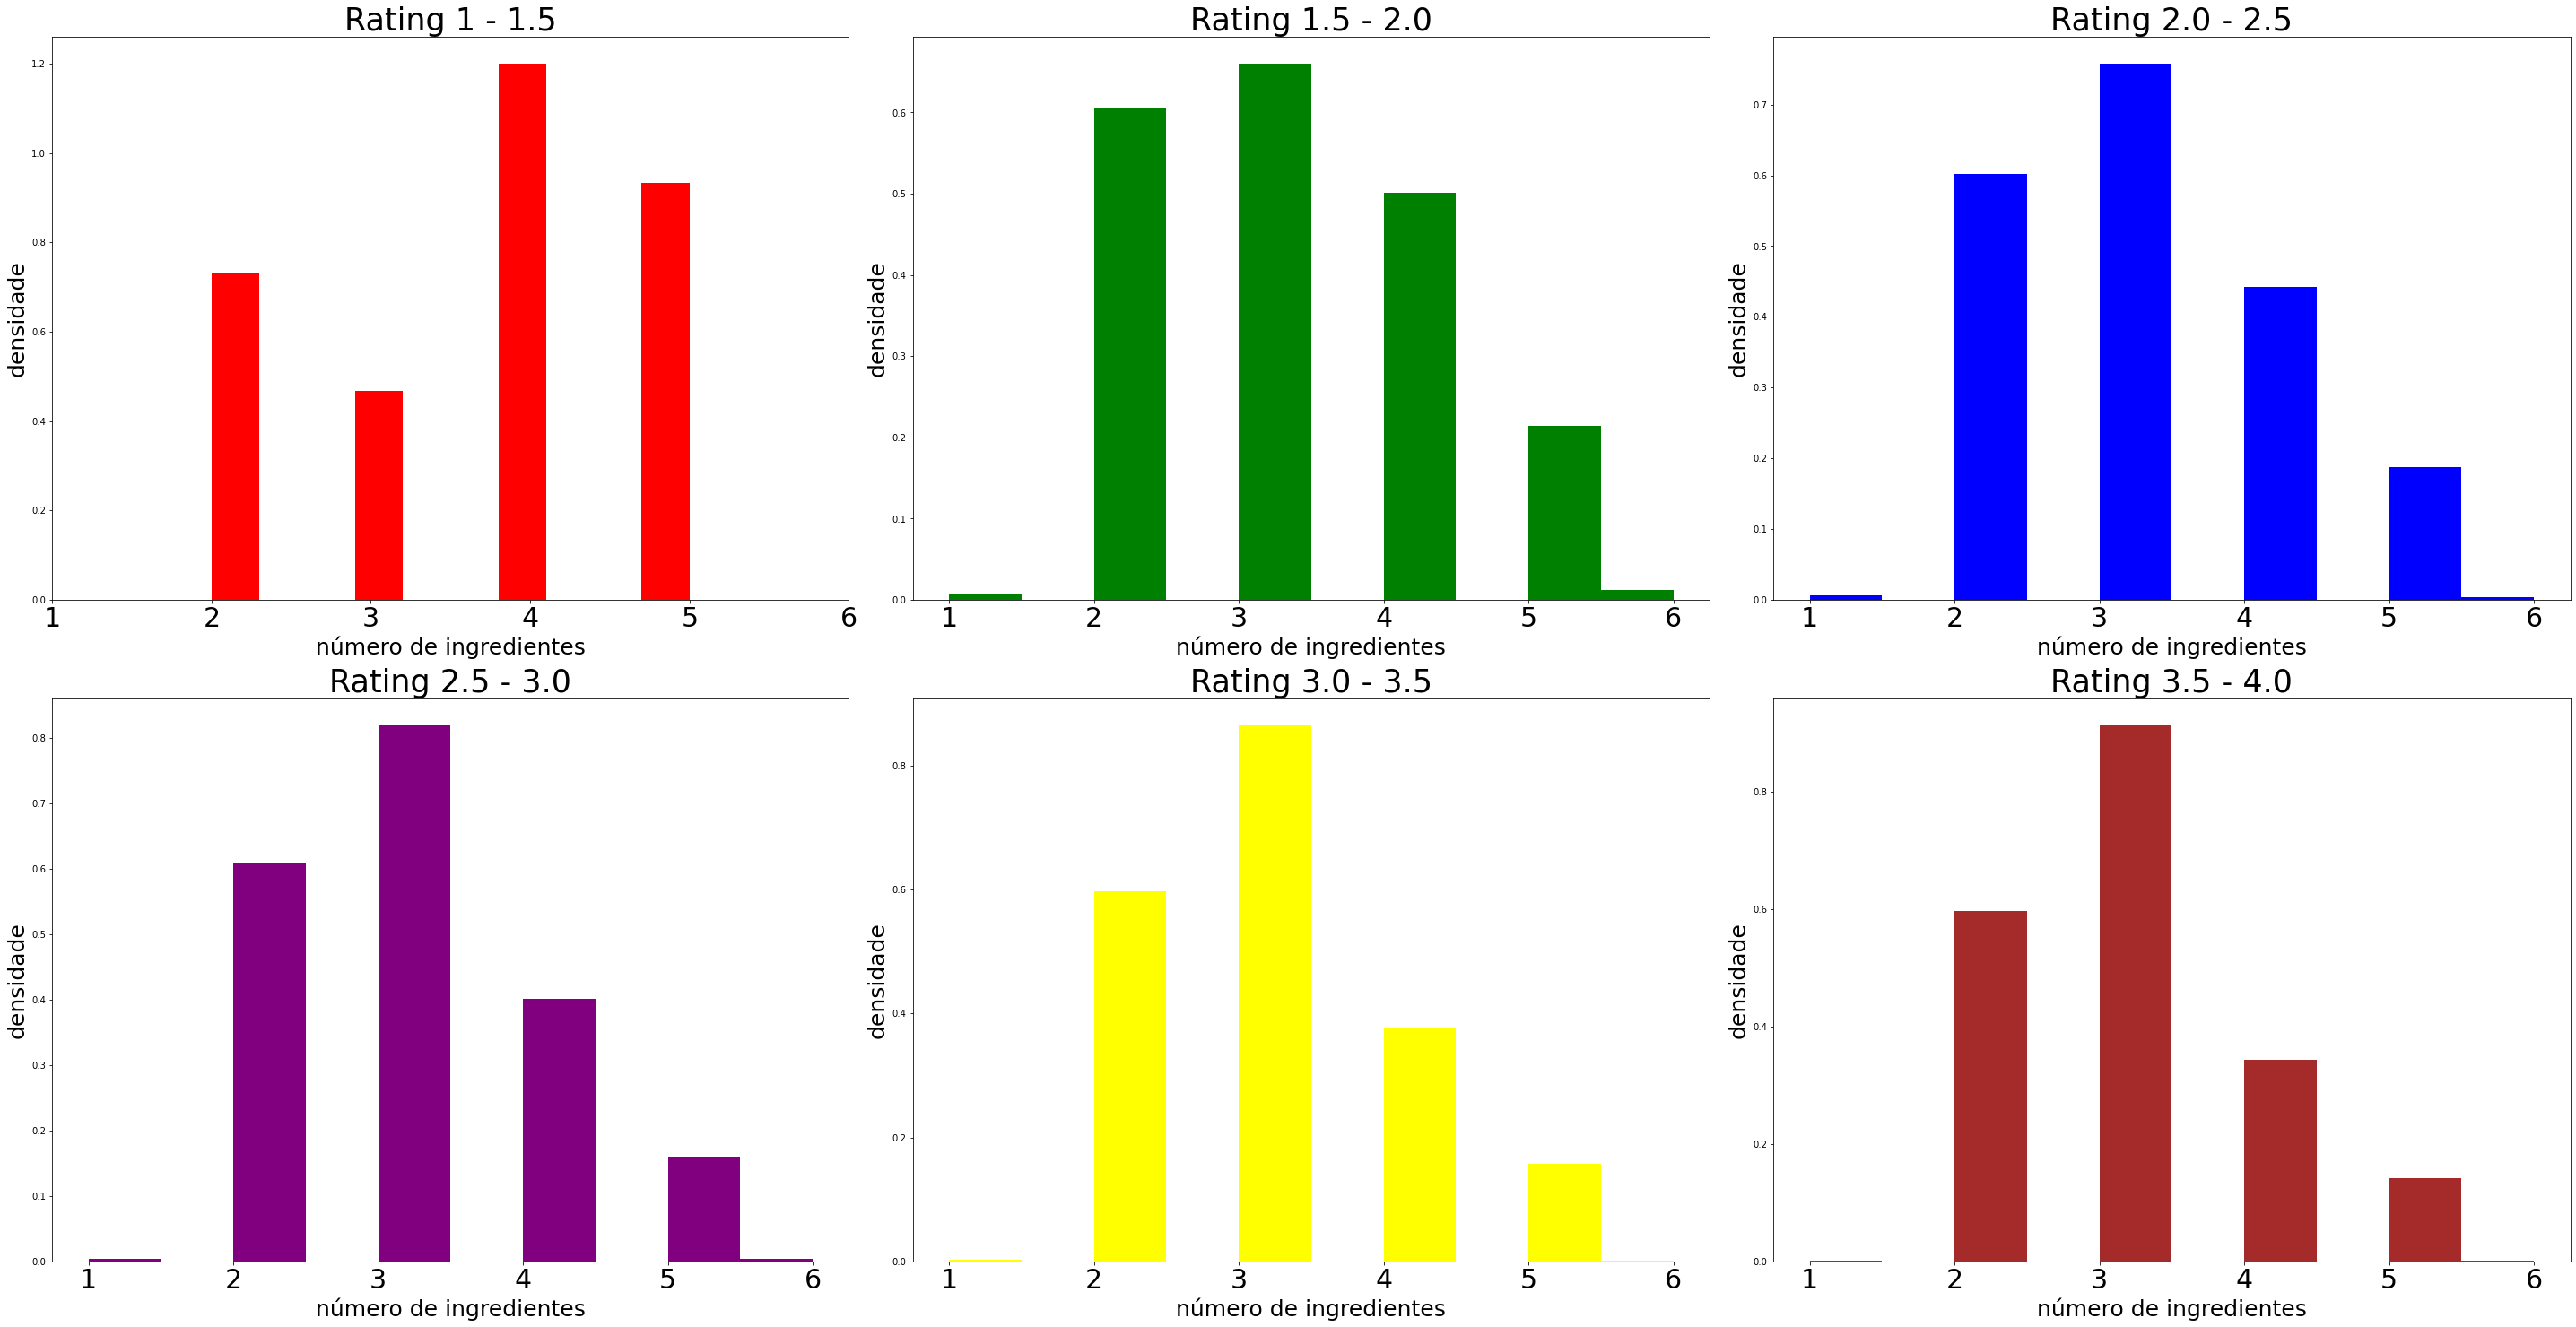

In [234]:
# num_ingr x rating

plt.figure(figsize=(40,30))
cor = ["red","green","blue","purple","yellow","brown"]
j=1
i=1
while i <4:
    plt.subplot(3,3,j)
    plt.hist(dados.loc[(dados.rating>=i) & (dados.rating<i+1.5),"num_ingr"],bins=10,density=True,color=cor[j-1])
    plt.title(f"Rating {i} - {i+0.5}", fontsize=35)
    plt.xticks([1, 2, 3, 4, 5, 6],fontsize=30)
    plt.xlabel("número de ingredientes",fontsize=25)
    plt.ylabel("densidade",fontsize=25)
    j+=1
    i+=0.5
plt.tight_layout()
plt.show()

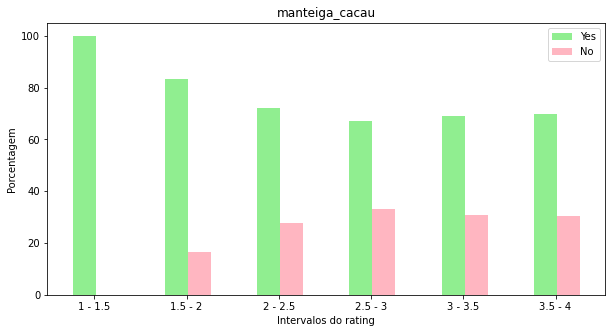

In [149]:
# manteiga_cacau x rating

yes_no("manteiga_cacau")

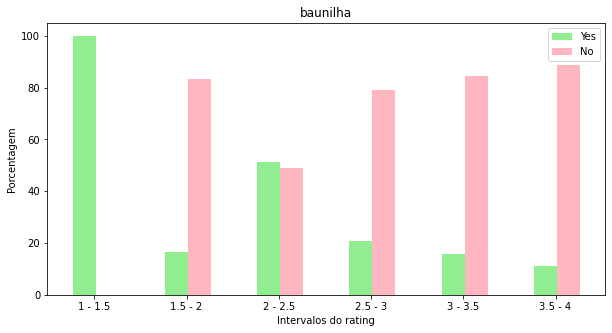

In [150]:
# baunilha x rating

yes_no("baunilha")

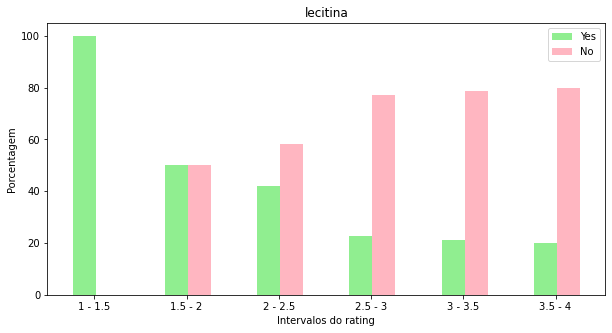

In [151]:
# lecitina x rating

yes_no("lecitina")